## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 35
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

# 1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異

In [6]:
"""Code Here
建立你的神經網路
"""
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[128,64,32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, unit in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=unit,
                                  activation="relu",
                                  name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x =  keras.layers.Dense(units=unit,
                                  activation="relu",
                                  name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)

    output_layer = keras.layers.Dense(units=output_units,
                                  activation="softmax",
                                  name="output_layer")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    
    return model

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for bs in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with BATCH_SIZE = %.d" %(bs))
    model = build_mlp(x_train.shape[1:])
    model.summary()
    opt = keras.optimizers.SGD(lr=LEARNING_RATE, momentum=MOMENTUM, nesterov=True)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)
    
    model.fit(x_train, y_train,
             epochs=EPOCHS,
             batch_size=bs,
             validation_data=(x_test, y_test),
             shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name = "exp-batch-size-%s" %str(bs)
    results[exp_name] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with BATCH_SIZE = 2
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
hidden_layer2 (Dense)        (None, 64)                8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                2080      
_________________________________________________________________
batch_normalization_3 (Batch

50000/50000 [==============================] - 31s 626us/step - loss: 1.8454 - accuracy: 0.3385 - val_loss: 1.6795 - val_accuracy: 0.3999
Epoch 2/35
50000/50000 [==============================] - 28s 566us/step - loss: 1.6964 - accuracy: 0.3951 - val_loss: 1.6522 - val_accuracy: 0.4111
Epoch 3/35
50000/50000 [==============================] - 28s 563us/step - loss: 1.6394 - accuracy: 0.4160 - val_loss: 1.6353 - val_accuracy: 0.4110
Epoch 4/35
50000/50000 [==============================] - 28s 564us/step - loss: 1.5954 - accuracy: 0.4330 - val_loss: 1.5690 - val_accuracy: 0.4510
Epoch 5/35
50000/50000 [==============================] - 28s 569us/step - loss: 1.5667 - accuracy: 0.4446 - val_loss: 1.5343 - val_accuracy: 0.4553
Epoch 6/35
50000/50000 [==============================] - 28s 564us/step - loss: 1.5512 - accuracy: 0.4477 - val_loss: 1.5068 - val_accuracy: 0.4699
Epoch 7/35
50000/50000 [==============================] - 28s 558us/step - loss: 1.5296 - accuracy: 0.4586 - val_loss

Epoch 11/35
50000/50000 [==============================] - 14s 275us/step - loss: 1.3621 - accuracy: 0.5135 - val_loss: 1.5126 - val_accuracy: 0.4596
Epoch 12/35
50000/50000 [==============================] - 15s 291us/step - loss: 1.3526 - accuracy: 0.5179 - val_loss: 1.4802 - val_accuracy: 0.4740
Epoch 13/35
50000/50000 [==============================] - 14s 284us/step - loss: 1.3455 - accuracy: 0.5199 - val_loss: 1.5782 - val_accuracy: 0.4496
Epoch 14/35
50000/50000 [==============================] - 14s 276us/step - loss: 1.3393 - accuracy: 0.5238 - val_loss: 1.4635 - val_accuracy: 0.4752
Epoch 15/35
50000/50000 [==============================] - 14s 275us/step - loss: 1.3261 - accuracy: 0.5280 - val_loss: 1.5588 - val_accuracy: 0.4526
Epoch 16/35
50000/50000 [==============================] - 16s 313us/step - loss: 1.3148 - accuracy: 0.5316 - val_loss: 1.4495 - val_accuracy: 0.4839
Epoch 17/35
50000/50000 [==============================] - 14s 284us/step - loss: 1.3010 - accuracy:

Epoch 21/35
50000/50000 [==============================] - 6s 120us/step - loss: 1.1403 - accuracy: 0.5949 - val_loss: 1.5093 - val_accuracy: 0.4726
Epoch 22/35
50000/50000 [==============================] - 6s 120us/step - loss: 1.1300 - accuracy: 0.5985 - val_loss: 1.5527 - val_accuracy: 0.4700
Epoch 23/35
50000/50000 [==============================] - 6s 120us/step - loss: 1.1200 - accuracy: 0.6050 - val_loss: 1.4910 - val_accuracy: 0.4793
Epoch 24/35
50000/50000 [==============================] - 6s 120us/step - loss: 1.1081 - accuracy: 0.6040 - val_loss: 1.5807 - val_accuracy: 0.4682
Epoch 25/35
50000/50000 [==============================] - 6s 121us/step - loss: 1.0943 - accuracy: 0.6112 - val_loss: 1.5346 - val_accuracy: 0.4586
Epoch 26/35
50000/50000 [==============================] - 6s 121us/step - loss: 1.0851 - accuracy: 0.6143 - val_loss: 1.5523 - val_accuracy: 0.4713
Epoch 27/35
50000/50000 [==============================] - 6s 121us/step - loss: 1.0759 - accuracy: 0.6182

50000/50000 [==============================] - 6s 121us/step - loss: 1.0606 - accuracy: 0.6226 - val_loss: 1.5558 - val_accuracy: 0.4805
Epoch 32/35
50000/50000 [==============================] - 5s 91us/step - loss: 1.0514 - accuracy: 0.6276 - val_loss: 1.6506 - val_accuracy: 0.4444
Epoch 33/35
50000/50000 [==============================] - 5s 91us/step - loss: 1.0402 - accuracy: 0.6329 - val_loss: 1.5644 - val_accuracy: 0.4782
Epoch 34/35
50000/50000 [==============================] - 4s 88us/step - loss: 1.0285 - accuracy: 0.6352 - val_loss: 1.7061 - val_accuracy: 0.4367
Epoch 35/35
50000/50000 [==============================] - 4s 88us/step - loss: 1.0206 - accuracy: 0.6371 - val_loss: 1.7652 - val_accuracy: 0.4355


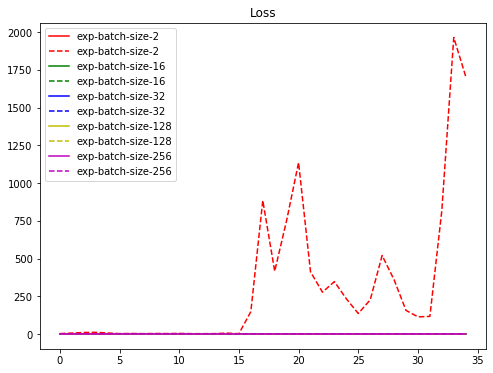

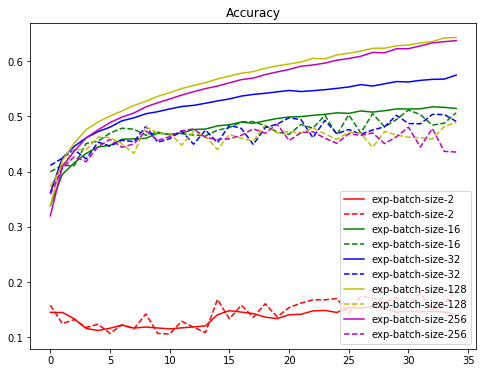

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# 2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
batch_size =256

In [9]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[128,64,32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, unit in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=unit,
                                  activation="relu",
                                  name="hidden_layer"+str(i+1))(x) 
        else:
            x = BatchNormalization()(x)
            x =  keras.layers.Dense(units=unit,
                                  activation="relu",
                                  name="hidden_layer"+str(i+1))(x)

    output_layer = keras.layers.Dense(units=output_units,
                                  activation="softmax",
                                  name="output_layer")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    
    return model

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
keras.backend.clear_session() # 把舊的 Graph 清掉
model = build_mlp(x_train.shape[1:])
model.summary()
opt = keras.optimizers.SGD(lr=LEARNING_RATE, momentum=MOMENTUM, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)

model.fit(x_train, y_train,
         epochs=EPOCHS,
         batch_size=256,
         validation_data=(x_test, y_test),
         shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
hidden_layer2 (Dense)        (None, 64)                8256      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                2080

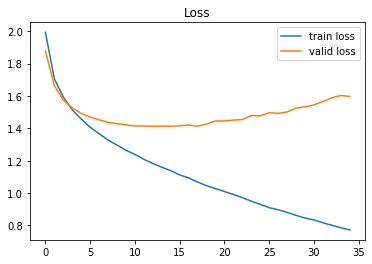

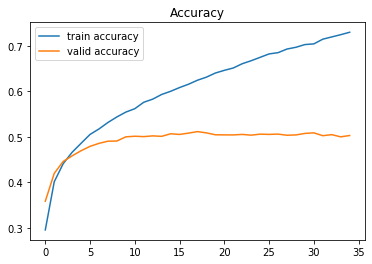

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

# 3. 請於 BN 放在 Input Layer 後，並比較結果
batch_size = 256

In [12]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[128,64,32]):
    input_layer = keras.layers.Input(input_shape)
    x = BatchNormalization()(input_layer)
    
    for i, unit in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=unit,
                                  activation="relu",
                                  name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
        else:
            x =  keras.layers.Dense(units=unit,
                                  activation="relu",
                                  name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)

    output_layer = keras.layers.Dense(units=output_units,
                                  activation="softmax",
                                  name="output_layer")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    
    return model

In [13]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
keras.backend.clear_session() # 把舊的 Graph 清掉
model = build_mlp(x_train.shape[1:])
model.summary()
opt = keras.optimizers.SGD(lr=LEARNING_RATE, momentum=MOMENTUM, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)

model.fit(x_train, y_train,
         epochs=EPOCHS,
         batch_size=256,
         validation_data=(x_test, y_test),
         shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
hidden_layer2 (Dense)        (None, 64)                8256      
_________________________________________________________________
batch_normalization_3 (Batch (None, 64)                256       
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                2080

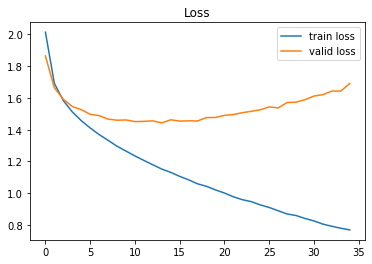

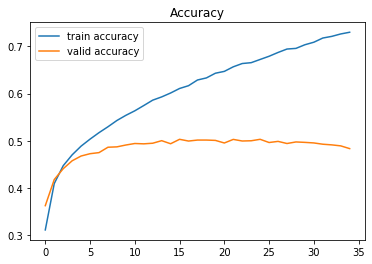

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## 心得
將Batch Normalization放置於activation之前，會使得驗證集輸出的結果較為平整，不容易波動。